# O algoritmo RSA

O algoritmo RSA envolve quatro passos: geração de chaves, distribuição dessas chaves, cifragem e decifragem.

O principio por trás do RSA são três números inteiros positivos muito grandes, chamados de "e", "d" e "n". A força da sua cifragem está na dificuldade da fatoração de "n" nos números "e" e "d"

## Geração das chaves

Para gerar o par de chaves, selecione dois número primos distintos, simulares em magnitude mas pouco diferente na quantidade de digitos para tornar a fatoração dificil.

No nosso exemplo utilizaremos números pequenos para reduzir a complexidade do tutorial, uma vez que estamos interessados na lógica.

In [1]:
p = 5
q = 7

Em seguida calcule o número "n" que é a multiplicação dos dois números primos. O número "n" será utilizado como módulo para a definição das chaves públicas e privadas

In [2]:
n = p * q

print(n)

35


O próximo passo é calcular a função Phi. Como "p" e "q" são primos a função Phi é definida como a multiplicação de p-1 e q-1

In [3]:
phi_of_n = (p - 1) * (q - 1)

print(phi_of_n)

24


Agora vamos importar algumas funções.

A primeira linha importa a função gcd que retorna o maior dividor comum entre dois números. Essa função é utilizada na lógica de geração da chave privada

A funçao random é utilizada para gerar um número aleatório

In [4]:
from math import gcd
import random

Abaixo temos a definição da função que gera a chave de cifragem, utilizada para gerar a chave privada

In [5]:
def get_encryption_key(n, phi_of_n):
    lst = [i for i in range(1, n+1)]
    e_list = []
    for i in lst:
        if (1 < i) and (i < phi_of_n):
            gcd_value = gcd(i, n)
            gcd_phi = gcd(i, phi_of_n)
            if (gcd_value == 1) and (gcd_phi == 1):
                e_list.append(i)
    if len(e_list) == 1:
        return e_list[0]
    else:
        return e_list[random.randint(1, len(e_list)-1)]  

E essa outra função gera a chave de decifragem, utilizada para gerar chave pública

In [6]:
def get_decryption_key(e, phi_of_n):
    d_list = []
    for i in range(e * 25):
        if (e * i) % phi_of_n == 1:
            d_list.append(i)
    return d_list[random.randint(1, len(d_list) - 1)]

O código abaixo utiliza as duas funções definidas acima para gerar as chaves privada e pública:

In [7]:
e = get_encryption_key(n, phi_of_n)
d = get_decryption_key(e, phi_of_n)

# Evitar colisão
while d == e:
    d = get_decryption_key(e, phi_of_n)

chave_publica = [e, n]
chave_privada = [d, n]

print(chave_privada)
print(chave_publica)

[335, 35]
[23, 35]


## Distribuição das chaves

Idealmente a chave privada não deve ser transmitida, mas gera no próprio disposito onde será utilizada, como equipamentos do tipo HSM (Hardware Security Module) que não permitam sua extração. Caso seja necessário a transmissão da chave privada, deve ser utilizado um meio confiável.

Já a chave pública precisa ser distribuida para que seja possível a critografia da mensagem pela outra parte. Nesse tutorial não vamos precisar distribuir a chave pública pois rodaremos todo o processo nesse notebook

## Cifragem da mensagem

Primeiro vamos definir uma função que retorna os valores ASCII dos caracteres da mensagem:

In [8]:
import string
def text_to_digits(PT):
    pool = string.ascii_letters + string.punctuation + " "
    M = []
    for i in PT:
        M.append(pool.index(i))
    return M

E agora definimos a função que faz a cifragem da mensagem usando a chave pública:

In [9]:
def encrypt(M, chave_publica):
    return [(i ** chave_publica[0]) % chave_publica[1] for i in M]

O passo final é cifrarmos a mensagem com as funções definidas acima

In [10]:
mensagem = "Meu teste"
mensagem_em_ascii = text_to_digits(mensagem)

mensagem_cifrada = encrypt(mensagem_em_ascii, chave_publica)
print(mensagem_cifrada)

[12, 9, 20, 14, 24, 9, 2, 24, 9]


## Decifragem da mensagem

De forma semelhante a cifragem da mensagem, vamos definir uma função auxilidar que retorna os caracteres da mensagem a partir do seus valores ASCII

In [11]:
def digits_to_text(DT):
    pool = string.ascii_letters + string.punctuation + " "
    msg = ''
    for i in DT:
        msg += pool[i]
    return msg

E agora definimos a função que faz a decifragem da mensagem:

In [12]:
def decrypt(CT, private_key):
    return [((i ** chave_privada[0]) % chave_privada[1]) for i in CT]

O passo final é utilizarmos esass funções para decifrar a mensagem:

In [13]:
mensagem_decifrage_em_ascii = decrypt(mensagem_cifrada, chave_privada) 
mensagem_aberta = original_PT = digits_to_text(mensagem_decifrage_em_ascii)

print(mensagem_aberta)

deuoteste


Dessa forma concluímos o exemplo do algorimo RSA, definindo as chaves pública e privada, cifrando e decifrando uma mensagem com essas chaves.

# O algoritmo de Shor

O algoritmo de Shor é um algoritmo capaz fatorar um número, ou em outras palavras encontrar os dois números utilizados para gerar outro através da multiplicação deles.

Esse é justamente o passo contrário ao RSA, que a partir de dois números primos compõem o número "n" que é sua base. Como vimos na sessão anterior precisamos ter acesso a esse número "n" tanto para cifrar como para decifrar uma mensagem. Ou seja, esse número é conhecido por todas as partes.

Portanto para decifrarmos uma mensagem cifrada no RSA precisamos de acesso ao número "n", um computador quântico com capacidade de execução do Shor para esse número "n" e a mensagem cifrada.

Na sessão sobre o algoritno RSA definidos o número "n" da nossa cifragem. A partir dele vamos obter pelo algorithmo de Shor seus fatores, que são os números base para recontrução das chave privada e pública.

O algoritmo de Shor é explicado em diversos materiais sobre computação quântica. Na sessão referências desse notebook você entrará alguns links com a explicação.

Vamos utilizar o Qiskit e o simulador de computador quântico da IBM para demonstrar o uso do algoritmo de Shor e obter os números "p" e "q" que definimos no início da explicação do algoritmo RSA.

Primeiro vamos importar as funções necessárias:

In [14]:
import math
import numpy as np
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Shor
from qiskit import IBMQ

O próximo passo é carregarmos o token da nossa conta no IBM Quantum Experience, que deve ter sido salvo no computador anteriomente, para conseguirmos rodar o simulador e não depender dos recursos da nossa máquina local.

Nesse código também obtemos o objeto que representa o backend desse simulador:

In [15]:
IBMQ.load_account()

provider = IBMQ.get_provider(group='open')
backend = provider.get_backend('ibmq_qasm_simulator')

Para finalizar criaremos o circuito do algoritmo de Shor para o valor de "n" que desejamos fatorar utilizando as funções do Qiskit.

Em seguida executaremos esse circuito obtendo os valores de "p" e "q" definidos no início desse notebook:

In [16]:
quantum_instance = QuantumInstance(backend, shots=30)
shor = Shor(quantum_instance=quantum_instance)
result = shor.factor(n)
print(f"Os fatores de \"n\" = {n} são {result.factors[0]}.")

Os fatores de "n" = 35 são [5, 7].


## A anotomia do algoritmo de Shor

Agora vamos construir um circuito que implementa o algoritmo de Shor utilizando Qiskit para mostrarmos a quantidade de qubits e o circuito em si. Essas informações são importantes para sabermos a capacidade do computador quântico necessário para executá-lo.

No desenho do circuito podemos ver os três grandes blocos que compõem o circuito:

1. Os operadores de Hadarmard (H) que colocam os qubits em superposição

2. O segundo bloco calcula os fatores do módulo do valor de N

3. O terceiro bloco é uma transformada de fourier, nesse circuito é responsável pela interferência que aumenta a probabilidade do retorno dos fatores do número N 

A explicação matemática e demais detalhes do algoritmo podem ser visto nas referências.

Porém podemos constatar que não temos atualmente um computador quântico com a quantidade de qbits necessário para fatorar o número "n" das chaves RSA utilizada para proteger nossos dados.

Número de qubits: 18


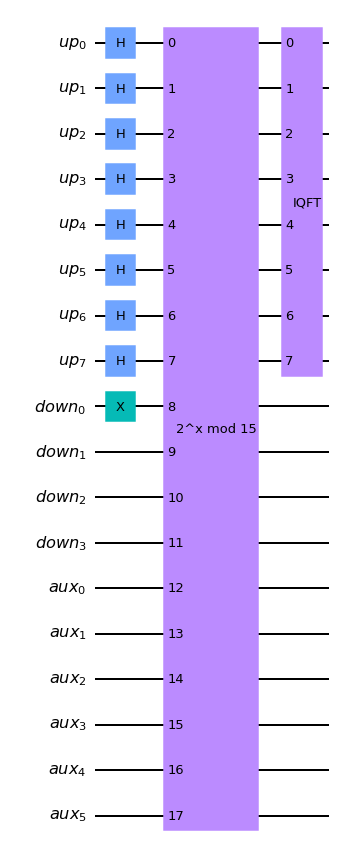

In [29]:
shor_circuit = shor.construct_circuit(15)

print(f"Número de qubits: {shor_circuit.num_qubits}")
shor_circuit.draw(output='mpl')

Concluímos essa sessão com um exemplo prático da capacidade do algoritmo de Shor fatorar o número "n" do algoritmo RSA. 

A partir desses fatores podemos recriar as chaves privada e pública e decifrar qualquer mensagem cifrada com a chave privada.

Porém no momento não temos um computador quântico com capacidade suficiente para fatorar o número "n" que é utilizado para proteger nossas comunições e muitos de nosos dados em repouso.

## Criptografia pós-quântica

Porém o que ocorrerá quando tivermos um computador quântico poderoso o suficiente para quebrar o RSA e outros algoritmos de ciptografia utilizados atualmente?

Para evitar esse problema estão em desenvolvimento os algoritmos de cripgrafia pós-quânticos. Recentemente o NIST publicou a lista dos primeiros algoritmos projetados para resistir aos computadores quânticos. Listamos alguns links sobre o assunto na sessão de referências. 

Mas esse é um assunto para outro notebook.

## Referências

Algoritmo RSA: https://en.wikipedia.org/wiki/RSA_(cryptosystem)

Implementação do algoritmo RSA: https://www.codespeedy.com/rsa-algorithm-an-asymmetric-key-encryption-in-python/#:~:text=RSA%20Algorithm%20working%20example&text=Compute%20totient%20%3D%20

Algoritmo de Shor: https://en.wikipedia.org/wiki/Shor%27s_algorithm

Explicação do algoritmo de Shor: https://qiskit.org/textbook/ch-algorithms/shor.html

Documentação do Qiskit: https://qiskit.org/documentation/tutorials/algorithms/08_factorizers.html

Página inicial da IBM Quantum Experience: https://quantum-computing.ibm.com/

Configuração da conta da IBM Quantum Experience: https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq

Links sobre criptografia pós-quântica:
- https://www.nist.gov/news-events/news/2022/07/nist-announces-first-four-quantum-resistant-cryptographic-algorithms

- https://www.inovacaotecnologica.com.br/noticias/noticia.php?artigo=selecionados-algoritmos-criptografia-resistentes-computadores-quanticos&id=010150220708#.YtYdgKTQ9zB

- https://thequantuminsider.com/2022/07/11/crypto-quantique-announces-first-post-quantum-computing-iot-security-platform-compliant-with-new-nist-standards/
